In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import csv
from scipy.misc import imread, imsave, imresize
from lasagne.utils import floatX

Using cuDNN version 5110 on context None
Mapped name None to device cuda0: GeForce GTX 950M (0000:01:00.0)


In [2]:
input_X = T.matrix('X')
input_shape = [None]
input_shape.extend([25088])
print(input_shape)
y_true = T.vector("target Y integer",dtype='int32')

[None, 25088]


In [3]:
from lasagne.layers import *

layer = InputLayer(shape =input_shape, input_var=input_X)
layer = DenseLayer(layer,3000, nonlinearity=lasagne.nonlinearities.rectify)
layer = DropoutLayer(layer,p=0.5)
layer = DenseLayer(layer,1000, nonlinearity=lasagne.nonlinearities.rectify)
layer = DropoutLayer(layer,p=0.5)
layer = DenseLayer(layer,1000, nonlinearity=lasagne.nonlinearities.rectify)
layer = DenseLayer(layer,2, nonlinearity=lasagne.nonlinearities.softmax)

output_layer = layer

In [4]:
y_test_predicted = lasagne.layers.get_output(output_layer, deterministic=True)
acc = lasagne.objectives.categorical_accuracy(y_test_predicted, y_true).mean()
accuracy_fun = theano.function([input_X, y_true], acc)
predict_fun = theano.function([input_X], y_test_predicted)

In [5]:
def predict_batch(X, batch_size=300):
    predictions = []
    for start in range(0,X.shape[0],batch_size):
        X_batch = X[start:start + batch_size]
        prediction = predict_fun(X_batch)
        predictions.extend(prediction.tolist())
    return np.array(predictions)       

In [8]:
def pickle_iter(file):
    while True:
        try:
            x = pickle.load(file)
        except:
            break
        yield x

In [9]:
file = open('data/NN_weights.pkl','rb')
all_weights = lasagne.layers.get_all_params(output_layer)
print(all_weights)
for i, x in enumerate(pickle_iter(file)):
    all_weights[i].set_value(x)
file.close()

[W, b, W, b, W, b, W, b]


In [31]:
file = open('data/train_ndarray.pkl','rb')

In [32]:
X, y, fname = pickle.load(file)

In [33]:
wrong_files = []
predictions = predict_batch(X)

In [34]:
np.sum(predictions.argmax(axis=1) == y)/X.shape[0]

0.99551999999999996

In [42]:
wrong = (predictions.argmax(axis=1) != y)

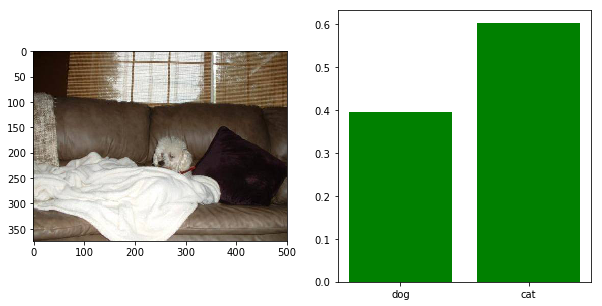

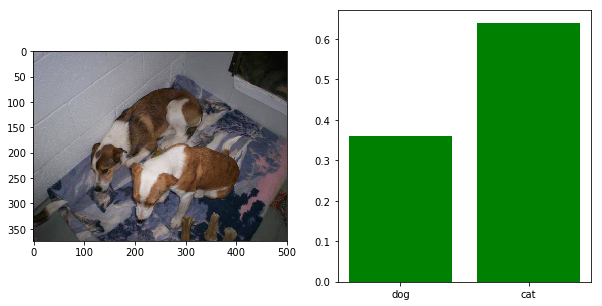

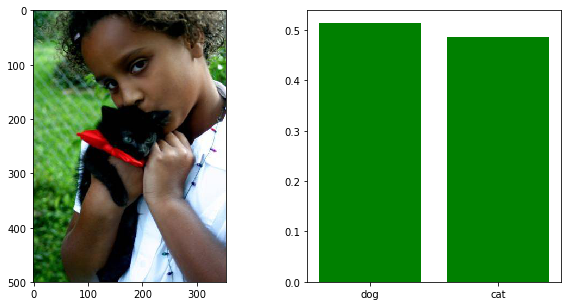

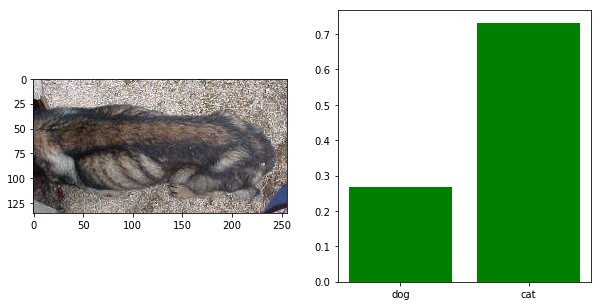

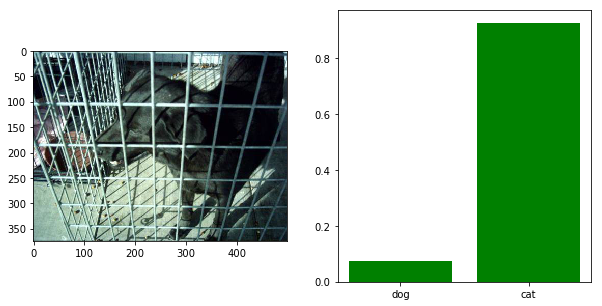

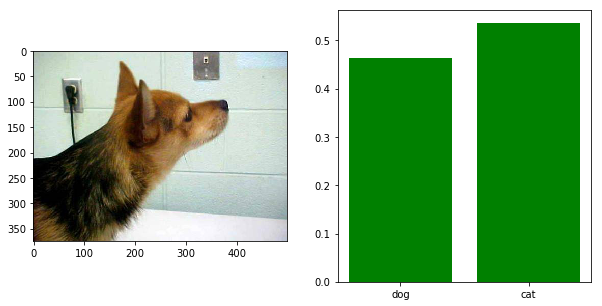

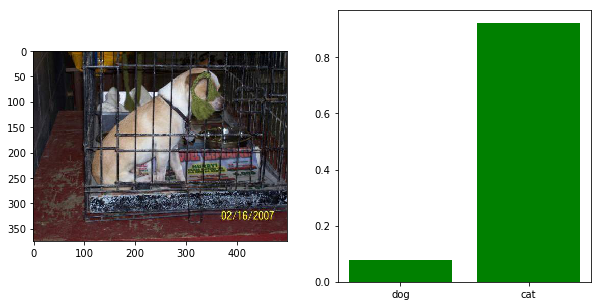

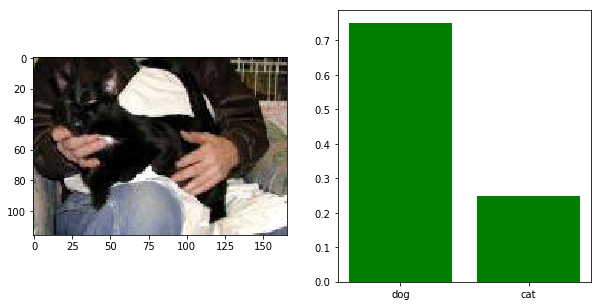

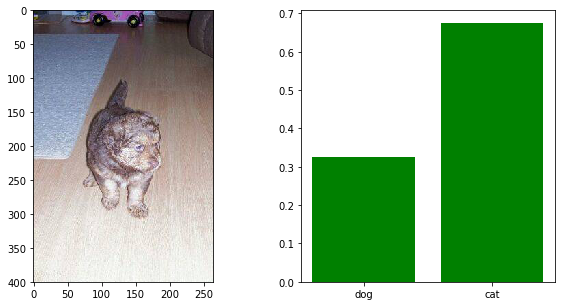

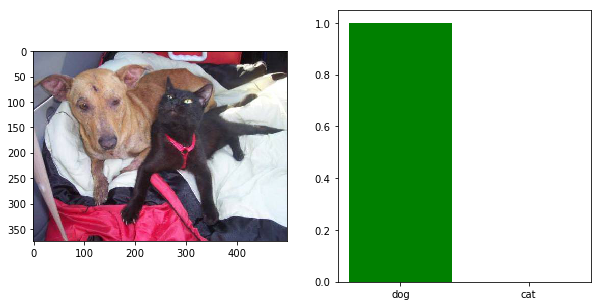

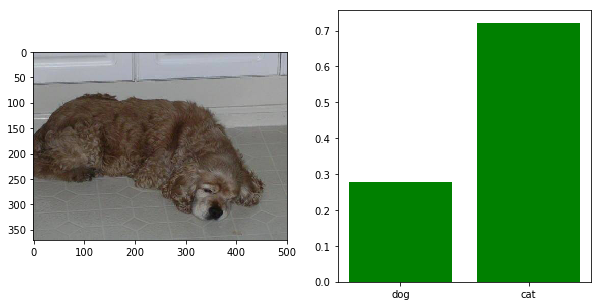

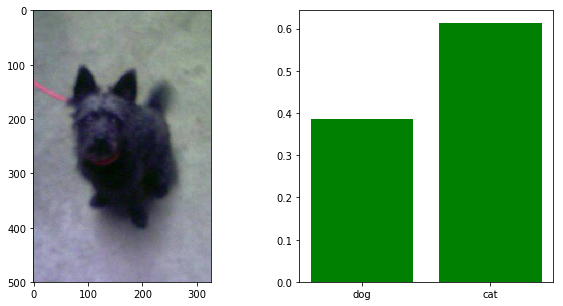

In [55]:
cnt = 10

for i, (p, filename) in enumerate(zip(predictions[wrong], fname[wrong])):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
    ax1.imshow(imread('train/' + filename))
    ax2.bar(np.arange(2), p, color='g')
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['dog','cat'])
    if i > cnt:
        break